In [3]:
%matplotlib inline
import random
random.seed(1234)
from string import punctuation
import pandas as pd
import gzip
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# import nltk
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import spacy
import matplotlib.pyplot as plt
import pyLDAvis #python library for interactive topic model visualization
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

# import gensim.downloader
# w2v = gensim.downloader.load('word2vec-google-news-300')

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# import warnings
# warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle
import numpy as np

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
# import pyLDAvis
# import pyLDAvis.sklearn
# import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm as tqdm
tqdm.pandas()
import math
import nltk
from collections import defaultdict

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
from nltk.probability import FreqDist
from gensim.models.ldamulticore import LdaMulticore
from nltk import tokenize

stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

from numpy import dot
from numpy.linalg import norm
import random

import itertools

#nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

from scipy.spatial.distance import pdist
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

from nltk.tokenize import sent_tokenize

from sklearn.preprocessing import MinMaxScaler
from nltk import pos_tag

import re

# from sentence_transformers import SentenceTransformer
# sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Read Data

In [4]:
df = pd.read_csv('./all_df.csv', index_col = False)

In [5]:
df0 = df.loc[(df.category_2 == 'Cats')]
df1 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Food') ]
df2 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Beds & Furniture')] 
df3 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Litter & Housebreaking')]
df4 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Toys')]
df5 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Treats')]
df6 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Grooming') ]
df7 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Feeding & Watering Supplies') ]
df8 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Cat Flaps, Steps, Nets & Pens') ]
df9 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Collars, Harnesses & Leashes') ]
df10 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Health Supplies')]
df11 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Educational Repellents')]
df12 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Carriers & Strollers')]
df13 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Cages')]
df14 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Memorials')]
df15 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Apparel')]

In [ ]:
# with open ('./model/df1.pickle', 'wb') as handle:
#     pickle.dump(df1, handle)

In [4]:
with open ('./model/df1.pickle', 'rb') as handle:
    df1 = pickle.load(handle)

In [72]:
df1.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,...,salesRank,imUrl,brand,categories,description,category_1,category_2,category_3,category_4,category_5
7723,7723,A11W8BQHCSU0RA,B00008437P,Connie Gelfer,"[0, 0]",I found these on sale and bought them on a whi...,5.0,need more!,1379462400,"09 18, 2013",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7724,7724,A2J5FJRZV4994H,B00008437P,"D. Bors ""Dors""","[1, 1]","My kittens were crazy over these, but as they ...",4.0,Favorite for some cats,1354579200,"12 4, 2012",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7725,7725,A7NB0VU0UQ88D,B00008437P,Gail Aslin,"[1, 1]",My cat absolutely loves spinners! She carries...,5.0,Best Cat Toy Ever!,1366675200,"04 23, 2013",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7726,7726,A1CV90TGSKF3DT,B00008437P,Jennifer,"[1, 2]",these were TINY and made out of very lightweig...,1.0,"TINY, CHEAPLY MADE, CAT CHOKED",1335744000,"04 30, 2012",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7727,7727,AZVMWL9E4T9ZD,B00008437P,"JR Dixey ""I am a technophile and librarian in...","[0, 0]",I bought this cat toy thinking that I would us...,5.0,For Birds Too!,1389398400,"01 11, 2014",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN


In [6]:
sents = [tokenize.sent_tokenize(str(r)) for r in df1.reviewText.tolist()]
columns_name = ['Sentence' + str(i) for i in range(1, 31, 1)]
sents_df1 = pd.DataFrame([sen[:30] for sen in sents], columns = columns_name)

In [ ]:
with open ('./model/sents_df1.pickle', 'wb') as handle:
    pickle.dump(sents_df1, handle)

In [5]:
with open ('./model/sents_df1.pickle', 'rb') as handle:
    sents_df1 = pickle.load(handle)

# Get attributes

In [6]:
def clean(sentence, stop_words):
    '''
    Clean sentence. 
            Parameters:
                    sentence (string): A string. 
                    stop_words (list): A list of words to be removed from a sentence. 
                    Lemmatize (boolean): A boolean to indicate whether or not to run lemmatization. . 
                    
            Returns:
                    _ (list): A list of cleaned tokens. 
    '''
    sen0 = ' '.join([word.lower() for word in str(sentence).split() if word.lower() not in stop_words])
    sen1 = sen0.translate(str.maketrans('', '', punctuation))
    tokens1 = [re.sub('[\d.,]' , '', word.lower()) for word in str(sen1).split() if word.lower() not in stop_words]
    sen2 = ' '.join(tokens1)
    tokens1 = [word.lemma_ for word in nlp(sen2)] 
    return tokens1

# def sent_to_words(sentences):
#     '''
#     Simplify and tokenize strings in an iterable.
    
#             Parameters:
#                     sentences (iterable): Review strings in a list or as a pandas.series.
                    
#             Returns:
#                     _ (generator): Simplify review tokens.  
#     '''
#     for sentence in sentences:
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def get_bigrams(data_words): 
    '''
    Form bigram.
    
        Parameters:
            data_words (iterable): token lists in an iterable. 

        Returns:
           _, _, bigram_pmi (data frame): Bigrams and their pmi scores in a Data Frame. 
    '''
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = nltk.collocations.BigramCollocationFinder.from_documents(data_words) 
    finder.apply_freq_filter(20)
    bigram_scores = finder.score_ngrams(bigram_measures.pmi)
    bigram_pmi = pd.DataFrame(bigram_scores)
    bigram_pmi.columns = ['bigram', 'pmi']
    bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
    
    bigram_scores2 = finder.score_ngrams(bigram_measures.raw_freq)
    bigram_freq = pd.DataFrame(bigram_scores2)
    bigram_freq.columns = ['bigram', 'freq']
    bigram_freq.sort_values(by='freq', axis = 0, ascending = False, inplace = True)

    return finder, bigram_measures, bigram_pmi, bigram_freq

def bigram_filter(bigram):
    """
    Filter bigram. 
        
        Parameters:
            bigram (string): A bigram.

        Returns:
           _ (boolean): Decide whether or not to keep the bigram.
    """
    stop_words = stopwords.words('english')   
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']: #we only want adjective + noun
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words: 
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram: 
        return False
    if len(bigram[0]) <= 2 or len(bigram[1]) <= 2:
        return False
    return True

def get_trigrams(data_words): 
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    finder = nltk.collocations.TrigramCollocationFinder.from_documents(data_words) 
    finder.apply_freq_filter(20)
    trigram_scores = finder.score_ngrams(trigram_measures.pmi)

    trigram_pmi = pd.DataFrame(trigram_scores)
    trigram_pmi.columns = ['trigram', 'pmi']
    trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
    
    trigram_scores2 = finder.score_ngrams(trigram_measures.raw_freq)
    trigram_freq = pd.DataFrame(trigram_scores2)
    trigram_freq.columns = ['trigram', 'freq']
    trigram_freq.sort_values(by='freq', axis = 0, ascending = False, inplace = True)

    return finder, trigram_measures, trigram_pmi, trigram_freq

def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    stop_words = stopwords.words('english')
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
        return False
    if 'PRON' in trigram:
        return False
    if len(trigram[0]) <= 2 or len(trigram[1]) <= 2 and len(trigram[2]) <= 2:
        return False
    return True 

def replace_ngram(x, bigrams, trigrams):
    '''
    Form ngram. 
        
        Parameters:
            bigram (string): a ngrams.

        Returns:
           x (string): A connected ngrams with underscore.  
    '''
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

def remove_stopwords(texts, extra_stopwords = []):
    '''
    Remove stopwords in an iterable (string or tokens).

        Parameters:
                texts (iterable): Review strings in a list or as a pandas.series.

        Returns:
                _ (list): Simplify review stirngs without stopwords.  
    '''
    stop_words = stopwords.words('english') + extra_stopwords
    return [[word for word in doc.split() if word not in stop_words] for doc in texts]

# def lemmatize_skip_ngrams(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     '''feed tokens'''
#     nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
#     texts_out = []
#     for sent in texts:
#         doc = nlp(' '.join(sent)) 
#         if len(allowed_postags) > 0: 
#             returned_doc = []
#             for token in doc:
#                 if '_' in token.text:
#                     returned_token = token.text
#                 if token.pos_ in allowed_postags and '_' not in token.text:
#                     returned_token = token.lemma_
#                 if token.pos_ not in allowed_postags and '_' not in token.text:
#                     continue
#                 returned_doc.append(returned_token)
#             texts_out.append(returned_doc)
                    
#         else: 
#             returned_doc = []
#             for token in doc:
#                 if '_' in token.text:
#                     returned_token = token.text
#                 else: 
#                     returned_token = token.lemma_
#                 returned_doc.append(returned_token)
#             texts_out.append(returned_doc)
#     return texts_out

<>:14: DeprecationWarning: invalid escape sequence \d
<>:14: DeprecationWarning: invalid escape sequence \d
C:\Users\JIATIN~1\AppData\Local\Temp/ipykernel_17924/1870827167.py:14: DeprecationWarning: invalid escape sequence \d
  tokens1 = [re.sub('[\d.,]' , '', word.lower()) for word in str(sen1).split() if word.lower() not in stop_words]


In [7]:
remove_words = ['dog',
 'cat',
 'food',
 'bed',
 'litter',
 'product',
 'love',
 'like',
 'well',
 'would',
 'work',
 'toy',
 'great',
 'make',
 'good',
 'time',
 'go',
 'I',
 'little',
 'small',
 'look',
 'try',
 'really',
 'seem',
 'recommend',
 'day',
 'month',
 'year',
 'much',
 'nice' , 
 'old', 
 'able', 
 'first', 
 'happy', 
 'thing', 
 'kitten'
]
extra_stopwords = ["don't", "donnt", "he's", "i'd", "would", "she's", "that's", \
                   "i'm", "can't", "i've", "they're", "we'll", "willn't", \
                   "isn't", "aren't", "wouldn't", "would've", "we've", "ve"] + \
                   ["cat", "food"] + remove_words
stop_words = sorted(list(set(stopwords.words('english')  + extra_stopwords + remove_words))) + \
['cat',
 'eat',
 'get',
 'dry',
 'feed',
 'buy',
 'give',
 'love',
 'find',
 'food',
 'try',
 'use',
 'bag',
 'go',
 'think',
 'wet',
 'know',
 'make',
 'seem',
 'say',
 'year',
 'kitty',
 'high',
 'see',
 'stuff',
 'come',
 'look',
 'keep',
 'want',
 'start',
 'every',
 'less',
 'free',
 'take',
 'need',
 'lot',
 'mix',
 'fancy',
 'many',
 'put',
 'feast',
 'good',
 'coat',
 'bit',
 'new',
 'something',
 'change',
 'case',
 'help',
 'sure',
 'month',
 'open',
 'box',
 'way',
 'bad',
 'big',
 'leave',
 'another',
 'last']

In [8]:
'last' in stop_words

True

In [9]:
len(sorted(set(stop_words)))

275

In [10]:
def extract_attributes(reviews, stop_words):
    cleaned_tokens = [clean(sen, stop_words = stop_words) for sen in reviews]
    sens = [' '.join(sen) for sen in cleaned_tokens] 
    cleaned_tokens2 = [[token.lemma_ for token in nlp(sen) if token.text not in stop_words] for sen in tqdm(sens)] #different ways to lemmatize

    bifinder, bimeasures, bi_pmi, bi_freq = get_bigrams(tqdm(cleaned_tokens)) 
    tri_finder, tri_measures, tri_pmi, tri_freq = get_trigrams(tqdm(cleaned_tokens))
    
    bifinder, bimeasures, bi_pmi2, bi_freq2 = get_bigrams(tqdm(cleaned_tokens2)) 
    tri_finder, tri_measures, tri_pmi2, tri_freq2 = get_trigrams(tqdm(cleaned_tokens2))
    print('get bigrams.')
    cleaned_bi_pmi = bi_pmi[bi_pmi.progress_apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)] 
    cleaned_bi_pmi2 = bi_pmi2[bi_pmi2.progress_apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)] 
# 
    print('get trigrams.')
    cleaned_tri_pmi = tri_pmi[tri_pmi.progress_apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)]
    cleaned_tri_pmi2 = tri_pmi2[tri_pmi2.progress_apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)]

    print('get lemmatized tokens from spacy.')
    tags = [pos_tag(sen) for sen in tqdm(cleaned_tokens2)]
    print('get adjectives.')
    adj_tokens = [t[0] for sen in tags for t in sen if t[1] == 'JJ']
    print('get nouns.')
    noun_tokens = [t[0] for sen in tags for t in sen if t[1] == 'NN']
    print('get verbs.')
    verb_tokens = [t[0] for sen in tags for t in sen if t[1] == 'VB']

    return {
        'cleaned_tokens': cleaned_tokens,
        'cleaned_tokens2': cleaned_tokens2,
        'cleaned_bi_pmi': cleaned_bi_pmi, 
        'cleaned_tri_pmi': cleaned_tri_pmi,
        'cleaned_bi_pmi2': cleaned_bi_pmi2, 
        'cleaned_tri_pmi2': cleaned_tri_pmi2,
        'cleaned_bi_freq': bi_freq, 
        'cleaned_tri_freq': tri_freq,
        'cleaned_bi_freq2': bi_freq2, 
        'cleaned_tri_freq2': tri_freq2,
        'tags': tags,
        'adj_tokens': FreqDist(adj_tokens).most_common(100),
        'noun_tokens': FreqDist(noun_tokens).most_common(100),
        'verb_tokens': FreqDist(verb_tokens).most_common(100)
    }

In [161]:
df1_dict = extract_attributes(tqdm(df1.reviewText.tolist()), stop_words = stop_words)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

get bigrams.


  0%|          | 0/3352 [00:00<?, ?it/s]

  0%|          | 0/2185 [00:00<?, ?it/s]

get trigrams.


  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

get lemmatized tokens from spacy.


  0%|          | 0/27843 [00:00<?, ?it/s]

get adjectives.
get nouns.
get verbs.


In [163]:
with open ('./model/df1_dict.pickle', 'wb') as handle:
    pickle.dump(df1_dict, handle)

In [19]:
with open ('./model/df1_dict.pickle', 'rb') as handle:
    df1_dict = pickle.load(handle)

In [13]:
df1_sen1_dict = extract_attributes(tqdm(sents_df1.Sentence1.tolist()), stop_words = stop_words)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

get bigrams.


  0%|          | 0/553 [00:00<?, ?it/s]

  0%|          | 0/552 [00:00<?, ?it/s]

get trigrams.


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

get lemmatized tokens from spacy.


  0%|          | 0/27843 [00:00<?, ?it/s]

get adjectives.
get nouns.
get verbs.


In [11]:
cleaned_sents_df1 = sents_df1.Sentence1.progress_apply(lambda x:clean(str(x), stop_words = stop_words))

  0%|          | 0/27843 [00:00<?, ?it/s]

In [ ]:
#sents_df1.Sentence2.tolist()

In [ ]:
#df1_sen2_dict = extract_attributes(tqdm(sents_df1.Sentence2.tolist()), stop_words = stop_words)

In [164]:
df1_dict['cleaned_bi_pmi2'] = df1_dict['cleaned_bi_pmi2'].reset_index(drop = True)
# remove_indexes1 = [44, 89, 84, 113, 114, 116, 117, 121, 122, 127, 137, 158, 159]
# keep_indexes1 = list(set(df1_dict['cleaned_bi_pmi2'][:160].index.tolist()) - set(remove_indexes1))

In [21]:
# df1_dict['cleaned_bi_pmi2'][:40]

In [185]:
keep_indexes = [6, 7, 8, 21, 23, 24, 26, 29, 30, 33, 35, 38, 68, 70, 75] #8? 
df1_dict['cleaned_bi_pmi2'].iloc[keep_indexes] # feature list 1
feature_lst1 = df1_dict['cleaned_bi_pmi2'].iloc[keep_indexes]['bigram'].tolist()

In [186]:
df1_dict['cleaned_bi_pmi2'][40:80]
feature_lst1

[('pyridoxine', 'hydrochloride'),
 ('thiamine', 'mononitrate'),
 ('powdered', 'cellulose'),
 ('choline', 'chloride'),
 ('fatty', 'acids'),
 ('calcium', 'iodate'),
 ('sodium', 'bisulfate'),
 ('sodium', 'bisulfite'),
 ('calcium', 'carbonate'),
 ('ferrous', 'sulfate'),
 ('zinc', 'oxide'),
 ('folic', 'acid'),
 ('ocean', 'whitefish'),
 ('zinc', 'sulfate'),
 ('break', 'bank')]

In [ ]:
feature_lst1

In [ ]:
df1_dict['cleaned_bi_pmi2'].iloc[keep_indexes]['bigram'].values

In [ ]:
bigrams = [' '.join(x) for x in df1_dict['cleaned_bi_pmi2'].iloc[keep_indexes]['bigram'].values]
#trigrams = [' '.join(x) for x in df1_dict['cleaned_tri_pmi2'].iloc[retain_indexes].trigram.values]

In [ ]:
sorted(bigrams) #'complete balanced', 'popular specialty', 'prime membership'

In [ ]:
w2v.similarity('zinc', 'sodium')

In [ ]:
sorted(list(set([w.split()[0] for w in bigrams] + [w.split()[1] for w in bigrams])))

In [ ]:
#FreqDist([w for sen in df1_dict['cleaned_tokens2'] for w in sen]).most_common(20)

In [190]:
df1_dict['cleaned_tri_pmi'] = df1_dict['cleaned_tri_pmi'].reset_index(drop = True) #not high quality - manually select
df1_dict['cleaned_tri_pmi2'] = df1_dict['cleaned_tri_pmi2'].reset_index(drop = True) #not high quality - manually select
retain_indexes = [47, 48, 53, 78]
feature_lst3 = df1_dict['cleaned_tri_pmi2'].iloc[retain_indexes]['trigram'].tolist()

In [191]:
df1_dict['cleaned_tri_pmi2'][40:80]
feature_lst3

[('diversity', 'flavor', 'choose'),
 ('vitamin', 'nutrient', 'mineral'),
 ('deliver', 'front', 'door'),
 ('royal', 'canin', 'special')]

In [ ]:
trigrams = [' '.join(x) for x in df1_dict['cleaned_tri_pmi2'].iloc[retain_indexes]['trigram'].values]

In [ ]:
sorted(trigrams)

In [ ]:
sorted(trigrams + bigrams +
      list(set([w.split()[0] for w in bigrams] + [w.split()[1] for w in bigrams])) +
      list(set([w.split()[0] for w in trigrams] + [w.split()[1] for w in trigrams] + [w.split()[2] for w in trigrams])))

In [ ]:
w2v.similarity('chronic', 'disease')

In [171]:
keep_indexes = [4, 8, 15, 28, 32, 38, 39, 65, 75, 76, 119] #product attributes
df1_dict['cleaned_bi_freq2'].iloc[keep_indexes]
feature_lst2 = df1_dict['cleaned_bi_freq2'].iloc[keep_indexes]['bigram'].tolist()

In [172]:
df1_dict['cleaned_bi_freq2'][80:120]
feature_lst2

[('natural', 'balance'),
 ('subscribe', 'save'),
 ('variety', 'pack'),
 ('quality', 'ingredient'),
 ('taste', 'wild'),
 ('different', 'flavor'),
 ('save', 'money'),
 ('brown', 'rice'),
 ('prescription', 'diet'),
 ('waste', 'money'),
 ('low', 'carb')]

In [178]:
df1_dict['cleaned_tri_freq2'] = df1_dict['cleaned_tri_freq2'].reset_index(drop = True) #not high quality - manually select
retain_indexes = [27, 17, 33, 34, 39, 41]
feature_lst4 = df1_dict['cleaned_tri_freq2'].iloc[retain_indexes]['trigram'].tolist()

In [180]:
df1_dict['cleaned_tri_freq2'][:40]
feature_lst4

[('subscribe', 'save', 'program'),
 ('complete', 'balanced', 'nutrition'),
 ('vitamin', 'b', 'supplement'),
 ('vitamin', 'e', 'supplement'),
 ('subscribe', 'save', 'option'),
 ('urinary', 'tract', 'health')]

In [ ]:
#[t[0] for t in df1_dict['noun_tokens']]

In [198]:
[t[0] for t in df1_dict['noun_tokens']]

feature_lst5 =  \
['brand',
 'flavor',
 'price',
 'ingredient',
 'quality',
 'chicken',
 'order',
 'variety',
 'grain',
 'meat',
 'smell',
 'formula',
 'treat',
 'taste',
 'wellness',
 'health',
# 'weight',
 'pack',
 'protein',
 'tuna',
 'science',
 'balance',
 'cost',
 'size',
 'friskie', #fresh
 'corn',
 'money',
 'turkey',
 'salmon',
 'amount',
 'byproduct',
 'beef',
 'ship',
 'care',
 'choice',
 'contain',
 'rice',
 'nutrition',
 'vitamin',
 'gravy',
 'chunk',
 'prescription',
 'waste']

In [199]:
[t[0] for t in df1_dict['adj_tokens']]

feature_lst6 = ['healthy',
 'expensive',
 'natural',
 'different',
 'cheap',
 'fish',
 'several',
 'kibble',
 'ingredient',
 'gravy',
 'organic',
 'fresh',
 'grainfree',
 'salmon',
 'nutritional',
'diabetic',
 'vegetable']

In [201]:
feature_lst = feature_lst1 +feature_lst2 + feature_lst3 + feature_lst4 + feature_lst5 + feature_lst6

# form ngram tokens

#### document level

In [ ]:
stop_words + ['kittens']

In [99]:
[[token for token in sen if token not in stop_words] for sen in df1_dict['cleaned_tokens2']] 

[['find',
  'sale',
  'buy',
  'whim',
  'omg',
  'nuts',
  'hardwood',
  'spin',
  'easily',
  'funny',
  'see',
  'kitty',
  'carry',
  'around',
  'mouth',
  'drop',
  'shoe',
  'etc',
  'fish',
  'need',
  'get',
  'furniture',
  'constantly',
  'retrieve'],
 ['kittens',
  'crazy',
  'grow',
  'pay',
  'attention',
  'new',
  'play',
  'fetch',
  'chase',
  'bring',
  'back',
  'long',
  'want',
  'throw',
  'carry',
  'around',
  'play',
  'never',
  'see',
  'crazy',
  'ten',
  'usually',
  'find',
  'one',
  'end',
  'furniture',
  'always',
  'locate',
  'one',
  'want',
  'one',
  'think',
  'overprice',
  'piece',
  'plastic',
  'right',
  'worth'],
 ['absolutely',
  'spinner',
  'carry',
  'around',
  'mouth',
  'toss',
  'around',
  'chase',
  'far',
  'favorite'],
 ['tiny',
  'lightweight',
  'plastic',
  'give',
  'one',
  'minute',
  'chew',
  'ball',
  'tip',
  'choke',
  'stay',
  'away'],
 ['buy',
  'thinking',
  'use',
  'spinner',
  'basis',
  'hang',
  'curious',
 

In [87]:
cleaned_sens = pd.DataFrame([re.sub(' +', ' ', ' '.join(sen)) for sen in df1_dict['cleaned_tokens2']], columns = ['cleaned_sens'])

In [88]:
bigrams = [' '.join(x) for x in df1_dict['cleaned_bi_pmi2'][:120].bigram.values]
trigrams = [' '.join(x) for x in df1_dict['cleaned_tri_pmi2'][:120].trigram.values]

In [89]:
cleaned_sens.cleaned_sens = cleaned_sens.cleaned_sens.map(lambda x: replace_ngram(x, bigrams, trigrams))

In [71]:
# bigrams2 = [' '.join(x) for x in df1_dict['cleaned_bi_freq2'][:120].bigram.values]
# trigrams2 = [' '.join(x) for x in df1_dict['cleaned_tri_freq2'][:120].trigram.values]

In [86]:
# cleaned_sens.cleaned_sens = cleaned_sens.cleaned_sens.map(lambda x: replace_ngram(x, bigrams2, trigrams2))

In [90]:
cleaned_sens.cleaned_sens[10]

'meet cat nutritional need'

In [91]:
cleaned_sens.iloc[27841]

cleaned_sens    cat one issue pancreatitis ok far feed mixture...
Name: 27841, dtype: object

In [95]:
cleaned_sens.cleaned_sens

0        find sale buy whim kitten omg go nuts hardwood...
1        kittens crazy grow pay attention new play fetc...
2        absolutely love spinner carry around mouth tos...
3        tiny make lightweight plastic give one minute ...
4        buy thinking use spinner basis hang curious pl...
                               ...                        
27838    cat receive wrong recipe order spot pate turke...
27839    buy twenty one year problem throw try change s...
27840    come take week explanation assume production r...
27841    cat one issue pancreatitis ok far feed mixture...
27842    new mother week name murphy cat adult life mur...
Name: cleaned_sens, Length: 27843, dtype: object

#### sentence level

In [92]:
cleaned_sens1 = pd.DataFrame([re.sub(' +', ' ', ' '.join(sen)) for sen in df1_sen1_dict['cleaned_tokens2']], columns = ['cleaned_sens'])

In [93]:
cleaned_sens1.cleaned_sens = cleaned_sens1.cleaned_sens.map(lambda x: replace_ngram(x, bigrams, trigrams))

In [94]:
cleaned_sens1.iloc[27841]

cleaned_sens    cat
Name: 27841, dtype: object

# investigate the corpus

In [100]:
updated_tags = [pos_tag(sen) for sen in tqdm(cleaned_sens.cleaned_sens.apply(lambda x:x.split()).values.tolist())]

  0%|          | 0/27843 [00:00<?, ?it/s]

In [101]:
connected_bigrams = [x.split()[0] + '_' + x.split()[1] for x in bigrams]
connected_trigrams = [x.split()[0] + '_' + x.split()[1] + '_' + x.split()[2] for x in trigrams]

In [ ]:
#[[t for t in sen if t[0] in connected_bigrams] for sen in updated_tags]
#[[t for t in sen if t[0] in connected_trigrams] for sen in updated_tags]

In [102]:
updated_tags[7] #('around', 'IN')

[('blu', 'NN'),
 ('love', 'VB'),
 ('somehow', 'RB'),
 ('find', 'VB'),
 ('one', 'CD'),
 ('around', 'IN'),
 ('house', 'NN'),
 ('love', 'NN'),
 ('toss', 'IN'),
 ('air', 'NN'),
 ('chase', 'NN'),
 ('tough', 'JJ'),
 ('keep', 'NN'),
 ('find', 'VBP'),
 ('one', 'CD'),
 ('order', 'NN'),
 ('x', 'VBZ'),
 ('pack', 'NNS'),
 ('take', 'VBP'),
 ('long', 'JJ'),
 ('get', 'NN'),
 ('quite', 'RB'),
 ('frankly', 'RB'),
 ('could', 'MD'),
 ('find', 'VB'),
 ('anywhere', 'JJ'),
 ('else', 'RB')]

In [103]:
adv_tokens = [t[0] for sen in updated_tags for t in sen if t[1] == 'RB']
#adv_tokens

In [104]:
remained_tokens = [[t[0] for t in sen if any([t[1] not in ['CD', 'RB', 'MD', 'VBZ', 'IN', 'VBZ'], "_" in t[0]])] for sen in updated_tags]

In [106]:
tokens = [token for sen in remained_tokens for token in sen]
mc_tuples = FreqDist(tokens).most_common(100)
mc_words = [t[0] for t in mc_tuples] 
mc_words = [t[0] for t in mc_tuples] 
mc_adjs = [t[0] for t in df1_dict['adj_tokens']] 
mc_verbs = [t[0] for t in df1_dict['verb_tokens']] 
mc_nouns = [t[0] for t in df1_dict['noun_tokens']] 

In [107]:
retain_words = [
# 'cat',
# 'eat',
# 'get',
# 'dry',
# 'feed',
# 'buy',
 'brand',
# 'give',
# 'love',
 'flavor',
# 'find',
# 'food',
 'chicken',
# 'try',
 'price',
 'ingredient',
# 'use',
 'healthy',
 'diet',
# 'bag',
 'vet',
 'pet',
 'store',
# 'go',
# 'think',
 'quality',
# 'wet',
# 'know',
# 'make',
 'amazon',
 'problem',
# 'seem',
# 'say',
# 'year',
 'order',
# 'kitty',
# 'high',
 'grain',
# 'see',
# 'come',
# 'stuff',
 'switch',
# 'look',
 'variety',
# 'keep',
# 'want',
 'smell',
# 'start',
# 'every',
 'expensive',
# 'less',
 'weight',
# 'free',
# 'take',
# 'need',
# 'lot',
 'natural',
# 'mix',
 'meat',
 'picky',
 'fancy_feast',
# 'many',
# 'put',
 'different',
 'formula',
 'treat',
# 'coat',
 'wellness',
# 'good',
 'week',
 'issue',
 'purchase',
# 'bit',
 'fish',
# 'new',
 'taste',
 'bowl',
 'cheap',
# 'something',
# 'change',
# 'case',
# 'help',
# 'sure',
 'throw',
# 'month',
 'gravy',
# 'open',
# 'box',
# 'way',
# 'bad',
# 'leave',
# 'big',
 'meal',
 'protein',
 'review',
 'tuna',
# 'another',
# 'last',
 'save',
 'health'
] + ['one', 'two', 'three', 'four', 'five', 'also', 'can', 'well', 'could', 'anything', 'also', 'different', 'enjoy', 'even', 'since', 'still', 'old']

In [110]:
deleted_words = [w for w in mc_words if w not in retain_words] + ['one', 'two', 'three', 'four', 'five', 'also', 'can', 'well', 'could', 'anything', 'also', 'different', 'enjoy', 'even', 'since', 'still', 'old'] + adv_tokens

In [111]:
deleted_words = list(set(deleted_words))

In [146]:
#sorted(deleted_words)

In [112]:
# import re
# re.sub('[\d.,]' , '', '25can')

In [113]:
final_tokens = [[token for token in sen.split() if token not in deleted_words] for sen in cleaned_sens.cleaned_sens.values.tolist()]

In [114]:
all_vocabularies = list(set([token for sen in final_tokens for token in sen]))

In [124]:
'would' in all_vocabularies

True

In [117]:
len(all_vocabularies)

32198

#### sentence level

In [118]:
updated_tags_sens1 = [pos_tag(sen) for sen in tqdm(cleaned_sens1.cleaned_sens.apply(lambda x:x.split()).values.tolist())]

  0%|          | 0/27843 [00:00<?, ?it/s]

In [119]:
remained_tokens_sens1 = [[t[0] for t in sen if any([t[1] not in ['CD', 'RB', 'MD', 'VBZ', 'IN', 'VBZ'], "_" in t[0]])] for sen in updated_tags_sens1]

In [120]:
final_tokens_sens1 = [[token for token in sen.split() if token not in deleted_words] for sen in cleaned_sens1.cleaned_sens.values.tolist()]

# LDA

In [121]:
def vectorize(texts):
    dictionary = corpora.Dictionary(tqdm(texts))
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in tqdm(texts)]
    return dictionary, doc_term_matrix

In [122]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Round: '+ str(num_topics))
        model = LdaMulticore(corpus=corpus, 
                                num_topics=num_topics, 
                                id2word=dictionary,
                                passes=40,
                                iterations=10, 
                                chunksize = 100, 
                                eval_every = None,
                                random_state = 1234) #random_state
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

def get_keywords(doc_term_matrix, model): #top 20
    keywords_dict = {}
    for k in range(len(model.top_topics(doc_term_matrix))):
        tu = model.top_topics(doc_term_matrix)[k]
        keywords_lst = []
        for tup in tu[0]:
            keywords_lst.append(tup[1])
        keywords_dict[k] = keywords_lst
    return keywords_dict

In [125]:
cats_food_dictionary, cats_food_doc_term_matrix = vectorize(final_tokens)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

In [126]:
cats_food_sen1_dictionary, cats_food_sen1_doc_term_matrix = vectorize(final_tokens_sens1)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

In [128]:
cats_food_model_list, cats_food_coherence_values = compute_coherence_values(
                                                    dictionary=cats_food_dictionary, 
                                                    corpus=cats_food_doc_term_matrix, 
                                                    texts=final_tokens, 
                                                    start=2, 
                                                    limit=20, 
                                                    step=2)

Round: 2
Round: 4
Round: 6
Round: 8
Round: 10
Round: 12
Round: 14
Round: 16
Round: 18


In [132]:
cats_food_model_list

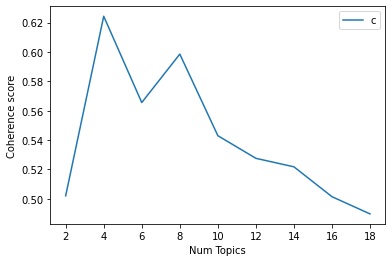

Num Topics = 2  has Coherence Value of 0.5021
Num Topics = 4  has Coherence Value of 0.6243
Num Topics = 6  has Coherence Value of 0.5656
Num Topics = 8  has Coherence Value of 0.5985
Num Topics = 10  has Coherence Value of 0.543
Num Topics = 12  has Coherence Value of 0.5276
Num Topics = 14  has Coherence Value of 0.5218
Num Topics = 16  has Coherence Value of 0.5015
Num Topics = 18  has Coherence Value of 0.4897


In [135]:
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, cats_food_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
for m, cv in zip(x, cats_food_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [136]:
with open ('./model/cats_food_model_list.pickle', 'wb') as handle:
    pickle.dump(cats_food_model_list, handle)

# model interpretation

In [137]:
with open ('./model/cats_food_model_list.pickle', 'rb') as handle:
    cats_food_model_list = pickle.load(handle)

In [ ]:
# for m in cats_food_model_list: 
#     print(CoherenceModel(model=m, 
#                    texts=df1_dict['cleaned_tokens2'], 
#                    dictionary=cats_food_dictionary, 
#                    coherence='c_v').get_coherence())

In [140]:
cats_food_optimal_model = cats_food_model_list[1] #flavor, ingrent, price, (and ?) #brand, formula etc
model_topics = cats_food_optimal_model.show_topics(formatted=False)
cats_food_optimal_model.print_topics(num_topics=8,num_words=30)

[(0,
  '0.053*"price" + 0.035*"order" + 0.014*"local" + 0.011*"brand" + 0.010*"large" + 0.009*"size" + 0.009*"receive" + 0.009*"shipping" + 0.007*"arrive" + 0.007*"carry" + 0.007*"several" + 0.007*"item" + 0.006*"online" + 0.006*"expensive" + 0.006*"delivery" + 0.006*"money" + 0.005*"per" + 0.005*"review" + 0.005*"beef" + 0.004*"dent" + 0.004*"small" + 0.004*"available" + 0.004*"convenient" + 0.004*"hate" + 0.004*"pound" + 0.004*"packaging" + 0.004*"send" + 0.004*"day" + 0.004*"stock" + 0.004*"house"'),
 (1,
  '0.019*"problem" + 0.012*"week" + 0.010*"sensitive" + 0.010*"clean" + 0.008*"work" + 0.008*"healthy" + 0.008*"day" + 0.007*"house" + 0.007*"morning" + 0.006*"night" + 0.006*"we" + 0.005*"without" + 0.005*"regular" + 0.005*"digestive" + 0.005*"time" + 0.005*"life" + 0.005*"do" + 0.005*"kind" + 0.005*"couple" + 0.004*"control" + 0.004*"fine" + 0.004*"health" + 0.004*"might" + 0.004*"care" + 0.004*"review" + 0.004*"wonderful" + 0.004*"siamese" + 0.004*"everything" + 0.004*"dish" + 0

In [141]:
pyLDAvis.enable_notebook()
topic_data =  pyLDAvis.gensim_models.prepare(cats_food_optimal_model, 
                                             cats_food_doc_term_matrix, 
                                             cats_food_dictionary
                                             #,mds = 'tsne'
                                            )
pyLDAvis.display(topic_data)

In [205]:
pyLDAvis.save_html(topic_data, 'cat_food_lda.html')

# link topics to sentence level (?????)

In [ ]:
#pprint(cats_food_optimal_model.show_topics(formatted=False, num_words=30))

In [ ]:
all_topics = {}
num_terms = 15 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,5): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values
pd.DataFrame(all_topics).T

In [ ]:
# documents --------------
# count = 0
# for i in cats_food_optimal_model[cats_food_doc_term_matrix]:
#     print('doc :', count, i)
#     count += 1 

In [ ]:
vector = cats_food_optimal_model[cats_food_sen1_doc_term_matrix] #cats_food_sen1_dictionary, cats_food_sen1_doc_term_matrix

In [ ]:
# sentences --------------
# count = 0
# for i in cats_food_optimal_model[cats_food_sen1_doc_term_matrix]:
#     print('doc :', count, i)
#     count += 1 

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=cats_food_optimal_model, 
                                                  corpus=cats_food_sen1_doc_term_matrix, 
                                                  texts=final_tokens_sens1)

In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
df_dominant_topic = pd.concat([df_dominant_topic, sents_df1.Sentence1], axis = 1)

In [ ]:
df_dominant_topic.head()

In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# # Show
# sent_topics_sorteddf_mallet.head()

In [ ]:
sent_topics_sorteddf_mallet

In [ ]:
pd.DataFrame(all_topics).T

In [ ]:
sent_topics_sorteddf_mallet.Sentence1[0] #?

In [ ]:
sent_topics_sorteddf_mallet.Sentence1[1] #?

In [ ]:
sent_topics_sorteddf_mallet.Sentence1[2] #?

In [ ]:
sent_topics_sorteddf_mallet.Sentence1[3] #?

In [ ]:
#df_dominant_topic[df_dominant_topic.Document_No == 27] #???

# train W2V model

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [233]:
#allreviews_lst = ' '.join([[word.lower() for word in str(sentence).split() if word.lower() not in stop_words] for sentence in df.reviewText.values.tolist()])

In [ ]:
model = Word2Vec(sentences=df1_dict['cleaned_tokens2'], size=300, window=5, min_count=20, workers=-1)
model.save("word2vec.model")

# link features, plus text parsing, link sentences

In [27]:
import gensim.downloader
w2v = gensim.downloader.load('word2vec-google-news-300')
# w2v = Word2Vec.load("word2vec.model")

def vectorize_features(features):
    '''
    Embed features to vectors. 

        Parameters:
                features (list): A list of features. 

        Returns:
                arr_dict (dictionary): A dictionary collects {'feature': vector}.
    '''
    arr_dict = {}
    for f in features:
        if isinstance(f, tuple) and len(f) == 2:
            arr = np.mean(np.array([w2v[f[0]], w2v[f[1]]]), axis=0)
            arr_dict[f] = arr
        if isinstance(f, tuple) and len(f) == 3:
            arr = np.mean(np.array([w2v[f[0]], w2v[f[1]], w2v[f[2]]]), axis=0)
            arr_dict[f] = arr
        if isinstance(f, str):
            arr = w2v[f]
            arr_dict[f] = arr

    return arr_dict

def compare_pairwise_features(features, arr_dict):
    '''
    Compute similarity of pairwise features. 

        Parameters:
                features (list): A list of features. 
                arr_dict (dictionary): A dictionary collects {'feature': vector}.

        Returns:
                similarity_dict (dictionary): A dictionary collects {'(pairwise features in a tuple)': similarity score}.
    '''
    pairs =list(itertools.combinations(features, 2))
    similarity_dict = {}
    for p in pairs:
        score = dot(arr_dict[p[0]], arr_dict[p[1]])/(norm(arr_dict[p[0]])*norm(arr_dict[p[1]]))
        similarity_dict[p] = score
    return similarity_dict 

In [ ]:
# all_topics = {}
# num_terms = 15 # Adjust number of words to represent each topic
# lambd = 0.6 # Adjust this accordingly based on tuning above
# for i in range(1,5): #Adjust this to reflect number of topics chosen for final LDA model
#     topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
#     topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
#     all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values
# topic_kw_tables = pd.DataFrame(all_topics).T

In [280]:
w2v.similarity('chunk', 'amount') 
w2v.similarity('deliver', 'shipping') 

0.15923679

In [253]:
w2v.similarity('diet', 'meal') #??????

0.39932004

In [278]:
w2v.most_similar('deliver')

[('delivering', 0.7694646120071411),
 ('delivered', 0.7016089558601379),
 ('delivers', 0.6644934415817261),
 ('Delivering', 0.6292617321014404),
 ('provide', 0.6142929792404175),
 ('todeliver', 0.5873906016349792),
 ('produce', 0.5805103778839111),
 ('Deliver', 0.5291215181350708),
 ('deliever', 0.5156580209732056),
 ('achieve', 0.5106956958770752)]

In [212]:
feature_lst1 = [f[0] + ' ' + f[1] if isinstance(f, tuple) and len(f) == 2 else f for f in feature_lst]
feature_lst2 = [f[0] + ' ' + f[1] + ' ' + f[2] if isinstance(f, tuple) and len(f) == 3 else f for f in feature_lst1]

In [ ]:
def bigram_filter(bigram):
    """
    Filter bigram. 
        
        Parameters:
            bigram (string): A bigram.

        Returns:
           _ (boolean): Decide whether or not to keep the bigram.
    """
    stop_words = stopwords.words('english')   
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']: #we only want adjective + noun
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words: 
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram: 
        return False
    if len(bigram[0]) <= 2 or len(bigram[1]) <= 2:
        return False
    return True

In [28]:
feature_lst2 = [
 'amount',
 #'balance',
 'beef',
 'brand',
 'break bank',
 'byproduct',
 'calcium carbonate',
 # 'calcium iodate', #?????????????????
 'cheap',
 'chicken',
 #'choice',
 'choline chloride',
 'chunk',
 'balanced nutrition',
 'corn',
 'cost',
# 'deliver front door',
# 'diabetic',
 'different flavor',
 'diversity flavor choose',
 'expensive',
 'fatty acids',
 'ferrous sulfate',
 'fish',
 'flavor',
 'folic acid',
 'formula',
 'fresh',
 #'friske',
 'grain',
 'gravy',
 'health',
 'ingredient',
 'kibble',
 'low carb', #adj + noun
 'meat',
 'money',
 'natural',
 'natural balance',
 'nutrition',
 'ocean whitefish', #noun + noun
# 'order',
 'organic',
 'pack',
 'powdered cellulose',
 'prescription',
 'price',
 'protein',
 'pyridoxine hydrochloride',
 'quality',
  'rice',
 'salmon',
 'save money',
 'several',
# 'ship',
 'size',
 'smell',
 'sodium bisulfate',
 'sodium bisulfite',
 'subscribe save',
 'subscribe save option',
 'subscribe save program',
 'taste',
 'taste wild',
 'thiamine mononitrate',
# 'treat',
 'tuna',
 'turkey',
 'variety',
 'variety pack',
 'vegetable',
 'vitamin',
 'vitamin b supplement',
 'vitamin e supplement',
 'vitamin nutrient mineral',
 'waste money',
# 'wellness',
 'zinc oxide',
 'zinc sulfate'
]

In [29]:
updated_feature_lst = []
for w in feature_lst2:
    if len(w.split()) == 2:
        updated_w = (w.split()[0], w.split()[1])
        updated_feature_lst.append(updated_w)
    if len(w.split()) == 3:
        updated_w = (w.split()[0], w.split()[1], w.split()[2])
        updated_feature_lst.append(updated_w)
    if len(w.split()) == 1:
        updated_feature_lst.append(w)

In [30]:
# feature_lst.remove(('manganese', 'proteinate'))
# feature_lst.remove(('zinc', 'proteinate'))
# feature_lst.remove(('copper', 'proteinate'))
# feature_lst.remove(('proteinate', 'copper'))

In [31]:
# feature_lst.remove(('calcium', 'pantothenate'))

In [32]:
vec_features = vectorize_features(updated_feature_lst)
dict_features = compare_pairwise_features(updated_feature_lst, vec_features)

In [ ]:
{k: v for k, v in sorted(dict_features.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
{k: v for k, v in sorted(dict_features.items(), key=lambda item: item[1], reverse=False)}

In [ ]:
for k, v in dict_features.items():
    if v < 0:
        dict_features[k] = 0

In [ ]:
{k: v for k, v in sorted(dict_features.items(), key=lambda item: item[1], reverse=True)}

# clustering graphing using dendrogram

In [33]:
updated_feature_lst

['amount',
 'beef',
 'brand',
 ('break', 'bank'),
 'byproduct',
 ('calcium', 'carbonate'),
 'cheap',
 'chicken',
 ('choline', 'chloride'),
 'chunk',
 ('balanced', 'nutrition'),
 'corn',
 'cost',
 ('different', 'flavor'),
 ('diversity', 'flavor', 'choose'),
 'expensive',
 ('fatty', 'acids'),
 ('ferrous', 'sulfate'),
 'fish',
 'flavor',
 ('folic', 'acid'),
 'formula',
 'fresh',
 'grain',
 'gravy',
 'health',
 'ingredient',
 'kibble',
 ('low', 'carb'),
 'meat',
 'money',
 'natural',
 ('natural', 'balance'),
 'nutrition',
 ('ocean', 'whitefish'),
 'organic',
 'pack',
 ('powdered', 'cellulose'),
 'prescription',
 'price',
 'protein',
 ('pyridoxine', 'hydrochloride'),
 'quality',
 'rice',
 'salmon',
 ('save', 'money'),
 'several',
 'size',
 'smell',
 ('sodium', 'bisulfate'),
 ('sodium', 'bisulfite'),
 ('subscribe', 'save'),
 ('subscribe', 'save', 'option'),
 ('subscribe', 'save', 'program'),
 'taste',
 ('taste', 'wild'),
 ('thiamine', 'mononitrate'),
 'tuna',
 'turkey',
 'variety',
 ('variet

In [34]:
from scipy.spatial.distance import pdist
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(np.array(list(vec_features.values())), 'average') #average and complete are good!!!

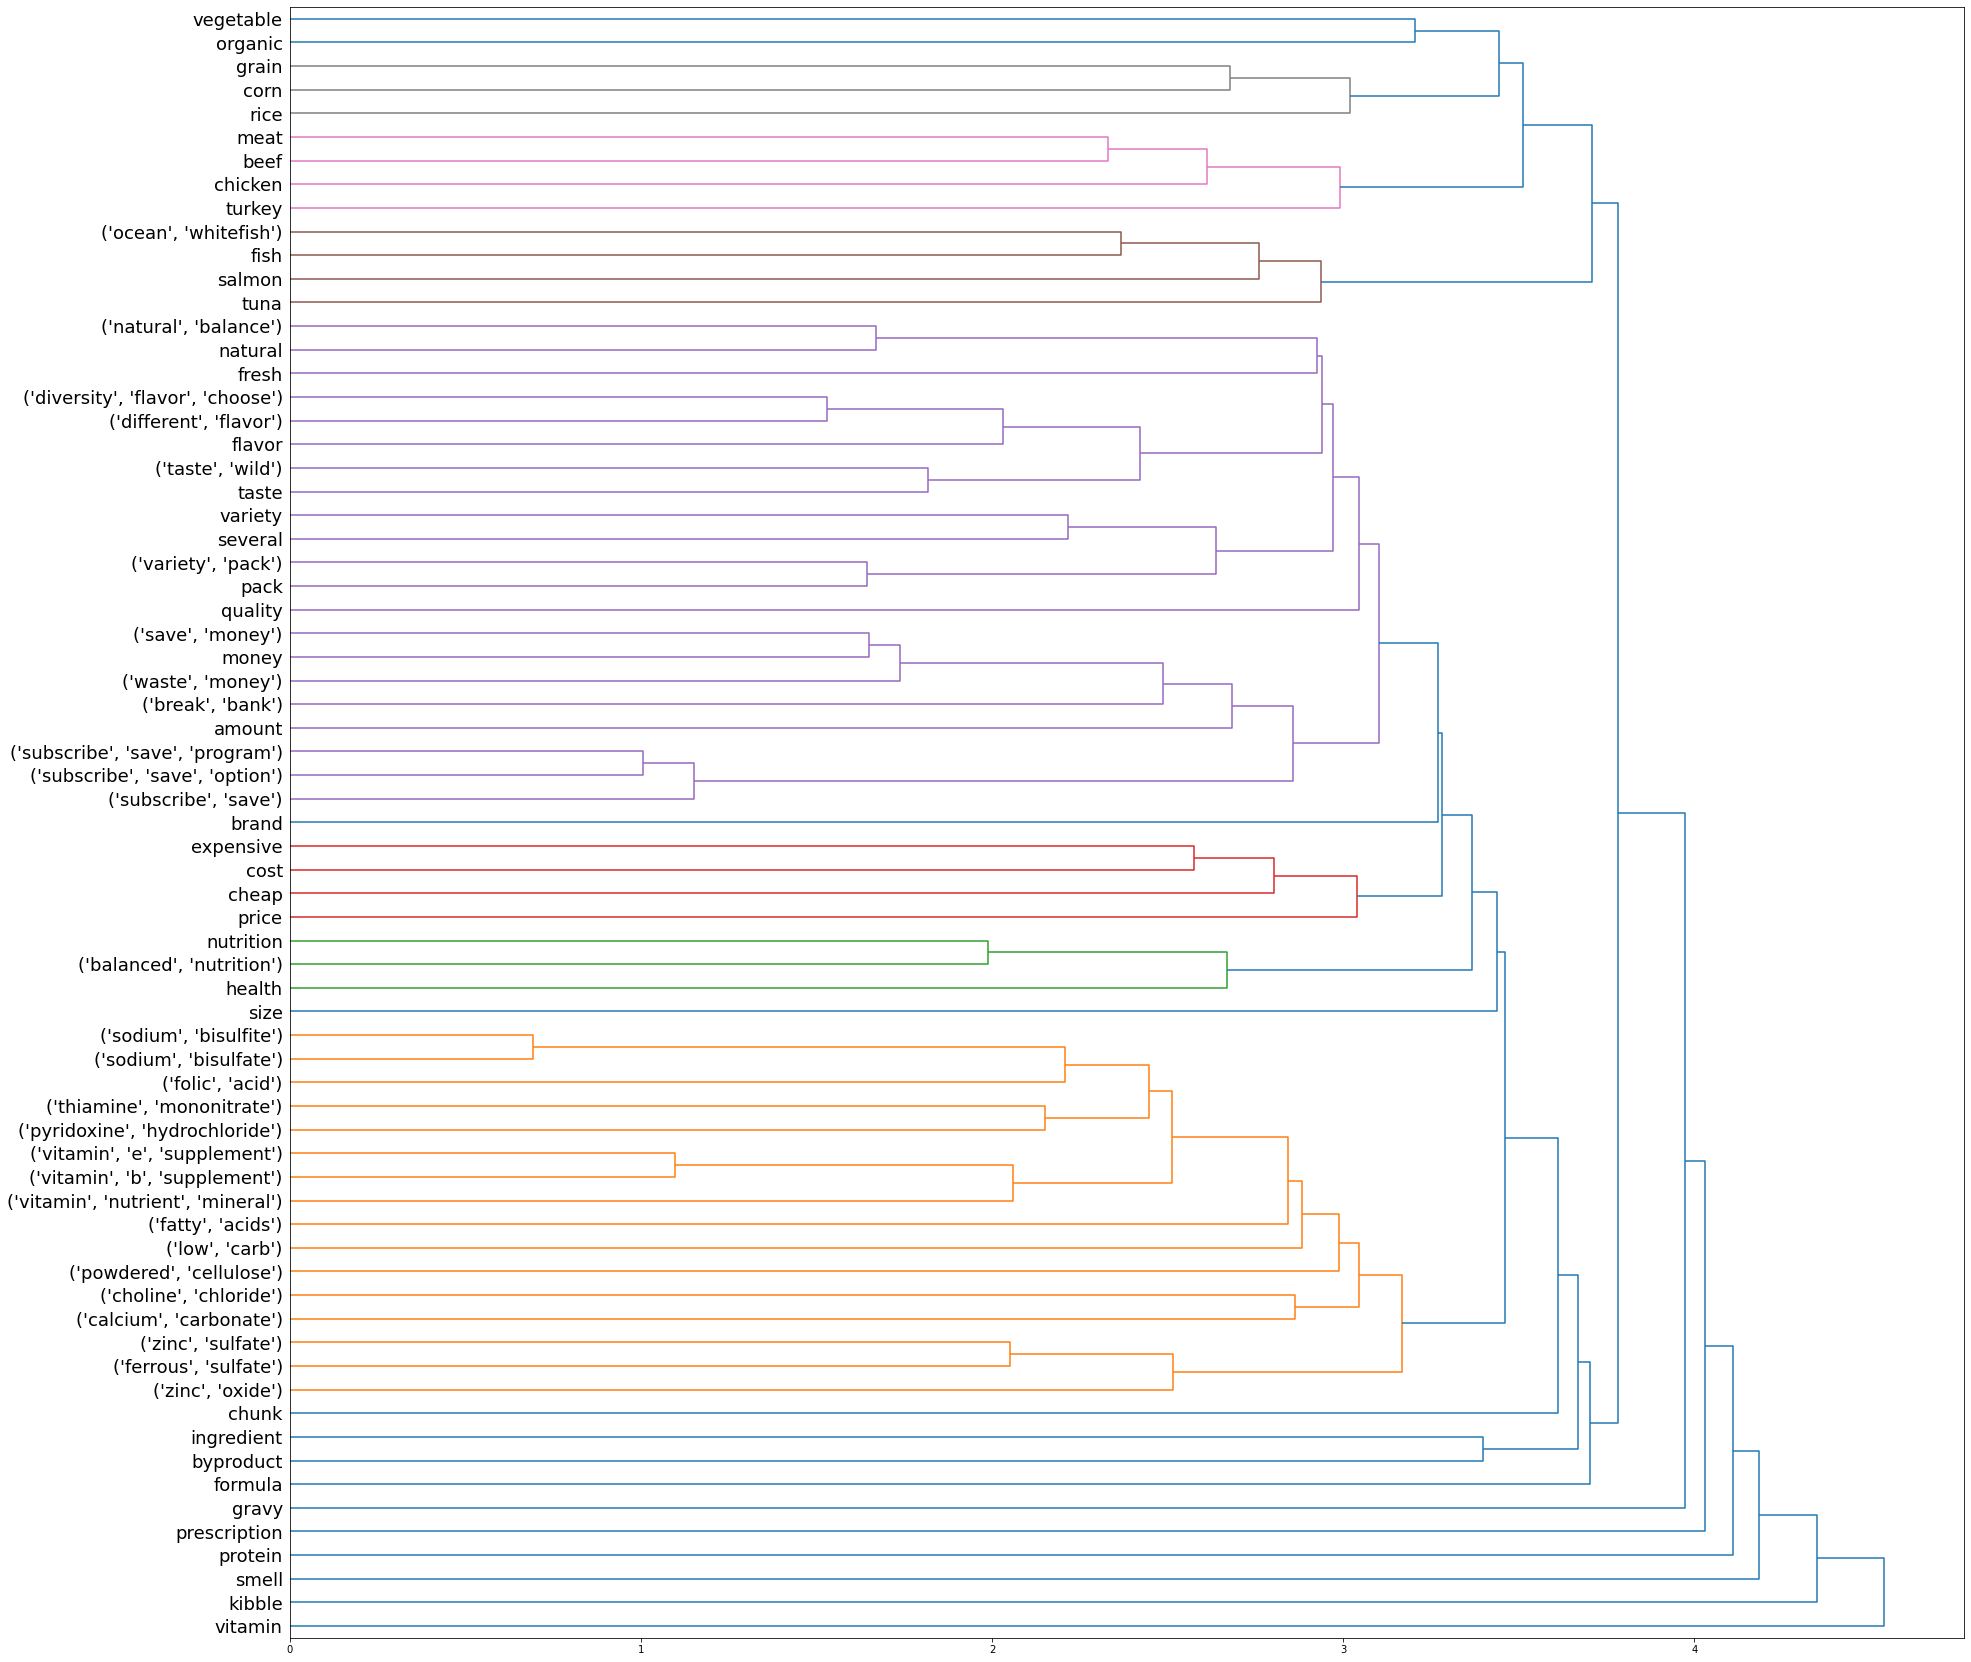

In [35]:
fig = plt.figure(figsize=(30, 30))
dn = dendrogram(Z, 
                orientation='right', 
                labels=list(vec_features.keys()),
                #color_threshold = 4,
               leaf_font_size = 18) #cosine distance = 1 - consine similarity
plt.show()

# sentence2vec - gensim.doc2vec

In [78]:
sents_df1.head()

,Sentence1,Sentence2,Sentence3,Sentence4,Sentence5,Sentence6,Sentence7,Sentence8,Sentence9,Sentence10,...,Sentence21,Sentence22,Sentence23,Sentence24,Sentence25,Sentence26,Sentence27,Sentence28,Sentence29,Sentence30
0,I found these on sale and bought them on a whi...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"My kittens were crazy over these, but as they ...",Now I have a new year old cat and he plays fet...,HE will chase it and bring it back as long as ...,He carries them around and plays by himself wi...,I have never seen a cat so crazy over a toy.,"I have ten of them, but can usually only find ...",He always seems to locate one when he wants one.,I think they are a little overpriced for littl...,None,None,...,None,None,None,None,None,None,None,None,None,None
2,My cat absolutely loves spinners!,She carries them around in her mouth when she ...,By far her favorite toy!,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,these were TINY and made out of very lightweig...,"i gave one to my cat and in under a minute, sh...",STAY AWAY.,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,I bought this cat toy thinking that I would us...,"I haven't made my own parakeet toys yet, so I ...","Then this evening, on the spur of the moment, ...",They have been a huge hit - I put them in abou...,"He picks them up, moves them around, drops the...",What a riot.,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [17]:
cleaned_sents_df1_lst = [[word for word in sen if word != ' ']for sen in cleaned_sents_df1.values.tolist() ]

In [18]:
len(cleaned_sents_df1_lst)

27843

In [19]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(cleaned_sents_df1_lst)]
tagged_data

[TaggedDocument(words=['find', 'sale', 'buy', 'whim', 'kitten', 'omg', 'go', 'nuts', 'hardwood', 'spin', 'easily', 'funny', 'kitty', 'carry', 'around', 'mouth', 'drop', 'shoe', 'etc', 'fish', 'furniture', 'constantly', 'retrieve'], tags=[0]),
 TaggedDocument(words=['kittens', 'crazy', 'grow', 'pay', 'attention'], tags=[1]),
 TaggedDocument(words=['absolutely', 'love', 'spinner'], tags=[2]),
 TaggedDocument(words=['tiny', 'make', 'lightweight', 'plastic'], tags=[3]),
 TaggedDocument(words=['buy', 'think', 'spinner', 'basis', 'hang', 'curious', 'playful', 'parakeet', 'cage'], tags=[4]),
 TaggedDocument(words=['lil', 'love', 'toy'], tags=[5]),
 TaggedDocument(words=['definitely', 'favorite'], tags=[6]),
 TaggedDocument(words=['blu', 'love'], tags=[7]),
 TaggedDocument(words=['cat', 'thing'], tags=[8]),
 TaggedDocument(words=['playful', 'use'], tags=[9]),
 TaggedDocument(words=['meet', 'cat', 'nutritional', 'need'], tags=[10]),
 TaggedDocument(words=['use', 'science', 'diet', 'year'], tags

In [37]:
model = Doc2Vec(tagged_data, vector_size = 300, window = 2, min_count = 1, epochs = 100) #window = The maximum distance between the current and predicted word within a sentence.

In [135]:
with open ('./model/gensim_d2v.pickle', 'wb') as handle:
    pickle.dump(model, handle)

In [15]:
with open ('./model/gensim_d2v.pickle', 'rb') as handle:
    model = pickle.load(handle)

In [52]:
def cosine(u, v):
    return np.dot(u, v) / (np.lisimnalg.norm(u) * np.linalg.norm(v))

In [36]:
cleaned_sents_df1_lst[0]

['find',
 'sale',
 'buy',
 'whim',
 'kitten',
 'omg',
 'go',
 'nuts',
 'hardwood',
 'spin',
 'easily',
 'funny',
 'kitty',
 'carry',
 'around',
 'mouth',
 'drop',
 'shoe',
 'etc',
 'fish',
 'furniture',
 'constantly',
 'retrieve']

In [21]:
test_doc_vector = model.infer_vector(cleaned_sents_df1_lst[0])

In [22]:
test_doc_vector.shape

(300,)

In [37]:
vec_features.keys()

dict_keys(['amount', 'beef', 'brand', ('break', 'bank'), 'byproduct', ('calcium', 'carbonate'), 'cheap', 'chicken', ('choline', 'chloride'), 'chunk', ('balanced', 'nutrition'), 'corn', 'cost', ('different', 'flavor'), ('diversity', 'flavor', 'choose'), 'expensive', ('fatty', 'acids'), ('ferrous', 'sulfate'), 'fish', 'flavor', ('folic', 'acid'), 'formula', 'fresh', 'grain', 'gravy', 'health', 'ingredient', 'kibble', ('low', 'carb'), 'meat', 'money', 'natural', ('natural', 'balance'), 'nutrition', ('ocean', 'whitefish'), 'organic', 'pack', ('powdered', 'cellulose'), 'prescription', 'price', 'protein', ('pyridoxine', 'hydrochloride'), 'quality', 'rice', 'salmon', ('save', 'money'), 'several', 'size', 'smell', ('sodium', 'bisulfate'), ('sodium', 'bisulfite'), ('subscribe', 'save'), ('subscribe', 'save', 'option'), ('subscribe', 'save', 'program'), 'taste', ('taste', 'wild'), ('thiamine', 'mononitrate'), 'tuna', 'turkey', 'variety', ('variety', 'pack'), 'vegetable', 'vitamin', ('vitamin', '

In [38]:
test_feature = vec_features['vitamin']

In [39]:
model.docvecs.most_similar(positive = [test_feature])

[(4167, 0.19710245728492737),
 (5856, 0.18839430809020996),
 (4101, 0.18564197421073914),
 (7613, 0.17812590301036835),
 (25157, 0.17756879329681396),
 (719, 0.17687790095806122),
 (24933, 0.17672832310199738),
 (13050, 0.17672348022460938),
 (8078, 0.174940288066864),
 (19538, 0.17162224650382996)]

In [119]:
sents_df1.Sentence1[4167] #?????

'I purchased this particular flavor for a sick senior cat who is slowly loosing her appetite and weight, high calorie item.'

In [120]:
sents_df1.Sentence1[5856] #?????

'My cats love this food and I feel good giving them this natural product that caters to senior cats.'

In [122]:
sents_df1.Sentence1[4101] #?????

'After putting our kitties on natural treats and food, we gave the California Roll to our kitties for their Christmas last year - all three loved it.'

In [ ]:
# waste money

In [40]:
test_idx = [idx for idx, sen in enumerate(cleaned_sents_df1_lst) if 'waste' in sen and 'money' in sen]

In [41]:
sents_df1.Sentence1[test_idx].values.tolist()

['MY 2 CATS..AGE 4 AND 2...LOVE THIS CAT FOOD SO MUCH THEY WILL NOT EAT ANYTHING ELSE..SO I AM HAPPY BECAUSE I DONT HAVE TO QUESS AT WHAT THEY MIGHT LIKE AND WASTE MONEY ON CAT FOOD..TRYING THEM..I HAVE BEEN FEEDING MINE SINCE THEY WERE 4 MONTHS OLD..WHEN I GOT THEM..',
 'My cat avoids *healthy* premium cat foods and loves the cheap stuff like Friskies but not wanting to feed that to her I have wasted lots of money on cat food.',
 "I'm always spending a bunch of money of trying to find different flavors that my picky kitties will eat - so I don't waste my money, ha!",
 'Wasted money!',
 "Don't even bother wasting your money.",
 'My cat is a jerk and will only eat the ocean whitefish, so this variety pack was a waste of money for me.',
 "For better or worse cats love FANCY FEAST and this Variety Pack is the best one offered because it includes 8 cans of three flavores, including Ocean Whitefish & Tuna, which all cats go bananas for.I tried saving money by giving my kitties store brands,

# sentence2vec - BERT 

In [2]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [47]:
sentence_embeddings = sbert_model.encode(sents_df1.Sentence1.values.tolist()) #embedding

In [49]:
print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

Sample BERT embedding vector - length 768


In [50]:
with open ('./model/sentence_embeddings_bert.pickle', 'wb') as handle:
    pickle.dump(sentence_embeddings, handle)

In [60]:
feature_vec = sbert_model.encode('vitamin')

In [61]:
sim_dict = {}
for idx, sent in enumerate(sents_df1.Sentence1.values.tolist()):
  sim = cosine(feature_vec, sbert_model.encode([sent])[0])
  sim_dict[idx] = sim

In [63]:
sorted_sim_dict = {k: v for k, v in sorted(sim_dict.items(), key=lambda item: item[1], reverse=True)}

In [64]:
sorted_sim_dict

{12186: 0.710034,
 6543: 0.68144023,
 27701: 0.653662,
 13789: 0.6340372,
 9269: 0.6264949,
 19791: 0.619125,
 25731: 0.61844915,
 4507: 0.60796356,
 6332: 0.60796356,
 13465: 0.60796356,
 14587: 0.60796356,
 21161: 0.60796356,
 24794: 0.60712487,
 18523: 0.6059896,
 13359: 0.6044056,
 24075: 0.60422117,
 26394: 0.6023675,
 45: 0.59861326,
 25947: 0.59699076,
 20838: 0.5961968,
 1299: 0.59535897,
 15240: 0.5951553,
 1497: 0.59476584,
 3716: 0.59476584,
 16963: 0.59476584,
 20499: 0.5945144,
 25454: 0.5918907,
 5987: 0.5913501,
 27513: 0.5903295,
 8654: 0.59003514,
 20601: 0.58909017,
 12328: 0.5884731,
 17130: 0.5884731,
 21176: 0.5883609,
 23695: 0.5854232,
 10857: 0.5815563,
 27109: 0.57915103,
 15578: 0.57703215,
 21650: 0.5770303,
 1082: 0.5756109,
 22119: 0.5730013,
 1233: 0.57279265,
 21254: 0.56937665,
 21474: 0.56937665,
 24923: 0.5671596,
 2207: 0.5642239,
 24415: 0.5636684,
 11603: 0.5635812,
 11732: 0.5635812,
 5664: 0.563059,
 15143: 0.5622293,
 15782: 0.5609278,
 24068: 0.

In [88]:
sents_df1.Sentence1[list({k for k, v in sim_dict.items() if v > 0.6})]

26394                                             ..
25731                                           Rec.
21161                                              .
18523                              INGREDIENTS LIST.
24075                                           OMG.
24794                                        Pros:1.
6543                                    with health.
13359                                           Hmm.
14587                                              .
19791           Good for nutrition and fiber intake.
9269     There is protein and then there is protein.
27701             Likes:- Nutrition and ingredients.
13465                                              .
12186                                 OK supplement.
4507                                               .
6332                                               .
13789           Rich in oils, vitamins and minerals.
Name: Sentence1, dtype: object

In [92]:
sents_df1.Sentence1[list({k for k, v in sim_dict.items() if v > 0.55 and v <= 0.6})]

15360                                           Ugh.
15362                                 Real sardines!
3716                                      Seriously.
24068                                           Wow.
21254                            Subscribe and save!
15240                        OK I am a Wellness fan.
1164                                      All right.
23695                                Mostly protein.
21650                          Like the ingredients.
1299            Great nutrition per the description.
20499                              My name is Petey.
11543        This seems to be what is stated on can.
19992                                            Hi.
24217                                            nan
2207                                 Umm, umm, good.
5664                             Thank you Wellness!
15782                                      Tried to.
13991                                     Full 1 LB.
12328                                         

In [93]:
sents_df1.Sentence1[list({k for k, v in sim_dict.items() if v > 0.5 and v <= 0.55})]

27138           Good for their teeth.
11269                   Great food...
21004                         thanks!
15885             Doing subscription.
16405                  I mix one tsp.
                     ...             
22515                     Last batch.
27124           Well, what can I say.
15351                    that's okay.
24570                          Sorry.
26621    Re Kirkland Nature's Domain.
Name: Sentence1, Length: 141, dtype: object

In [96]:
sents_df1.Sentence1[list({k for k, v in sim_dict.items() if v > 0.45 and v <= 0.5})]

10241                                       Good seller.
10242                                       great value.
9219                                         Great food.
1028                                            Finally!
17414                                        Great food.
                              ...                       
27129                                        Love these!
10235              Good healthy product at a good price.
21500                                    So far so good.
10749    Yes, Diamond has had food recalled in the past.
1534                                   I'm a vegetarian.
Name: Sentence1, Length: 302, dtype: object